<center><h1>Factor models</h1></center>

<center>William Mann</center>

<center>
<img src="https://wgjm1986.github.io/Investments/Emory_small.png" height="200px" width="300px" />
</center>

### Today's topic: Studying investment ideas with return spreads

The spread between two investment returns is an investable strategy, if you can short-sell. On a more abstract level, it is also a useful tool for studying the underlying investment idea.

As we saw last time, the beta of the return spread will be the difference of the betas of the long and short portfolios. For example, if each portfolio consists of stocks, their betas will likely be close to one, the beta of the spread will be close to zero, and the alpha of the spread will roughly equal the average spread.

Then, just by tracking the spread over time, we can see how the strategy becomes more or less attractive.

A return spread used for this purpose is often called a *factor*.
We can use *factor models* to help analyze *other* strategies, and ask whether they are really new, or simply repackage things we already knew about.

We will look at the best-known approach to building factors, and then the best-known factor model.

## The Fama-French approach

The basic idea of a factor is just to build portfolios that are "good" and "bad" according to some investment philosophy, then subtract their returns. But within this idea, there are many details to consider, and many different potential approaches that you could take.

The best-known approach was developed by Eugene Fama and Ken French in a series of papers decades ago. Their approach is known as the “Fama-French” approach,
and it is now the most popular measure of factor performance.  

Their numbers are continually updated on French’s [website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

The rest of these slides explain the details of their approach.
The textbook discusses some of these issues on pages 419–420.

### Detail 1: Size and value together, then momentum

When the FF approach was first developed, size and value were
widely accepted factors, but momentum was not.

Thus, the FF measures of size and value performance are closely
connected to each other, as we will see in the next few slides.

In contrast, the FF measure of the momentum effect was
developed later and is somewhat separate from the others.

We’ll first explain their size and value measures, SMB and HML,
then their momentum measure, UMD.

### Detail 2: Timing of the market cap and BM measures

We sort stocks by market cap to exploit the size premium,
and by the book/market ratio to exploit the value premium.

The Fama-French approach does this once every year.

To construct the BM ratio, they use the book value of equity
from the company’s fiscal year-end.

However, investors cannot access 10-Ks immediately on Dec 31,
and we want our numbers to reflect an investable strategy.

So, FF wait until *June* of each year to sort the stocks,
and then sort based on market cap from the beginning of June,
but on BM ratios calculated as of the prior Dec 31.

### Detail 3: Double-sort on size and BM at the same time

Each June, sort stocks on both dimensions at once,
and separate into six portfolios with a few hundred stocks each:
- Big versus Small market cap;
- High, Medium, or Low B/M ratio.
Calculate a VW return on each portfolio: $r_{S/L}$ , $r_{B/L}$ , etc.

<center>
<img src="https://wgjm1986.github.io/Investments/Module%203/Week%2012%20-%20Factor%20models/FF_double_sort.png" width="300px" height="500px"/>
</center>

## Return spread formulas (textbook p.408)

$$
r_{SMB} = \frac{1}{3}(r_{S/L} + r_{S/M} + r_{S/H}) - \frac{1}{3}(r_{B/L} + r_{B/M} + r_{B/H})
$$

$$
r_{HML} = \frac{1}{2}(r_{S/H} + r_{B/H}) - \frac{1}{2}(r_{S/L} + r_{B/L})
$$

Measure the size premium as “small minus big” (SMB):  
the average return on the three “small” portfolios,
minus the average return on the three “big” portfolios.

Measure the value premium as “high minus low” (HML):  
the average return on the two highest-BM portfolios,
minus the average return on the two lowest-BM portfolios.

We say SMB and HML are "neutralized" against the market *and* each other. The correlations between them all will be near zero (though not exactly zero).

## A look at the SMB factor since 1950

In [1]:
%%capture

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

import wrds
import math
import statsmodels.formula.api as sm
import wget, shutil
import os

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16.0, 8.0]

conn = wrds.Connection(wrds_username='wmann')
FF3F = conn.get_table(library='ff_all',table='factors_monthly')
FF3F['month'] = pd.to_datetime(FF3F['date']).dt.to_period('M')
FF3F = FF3F.drop(['date','dateff','year'],axis=1).set_index('month')
FF3F = FF3F['1926':'2023']
FF3F = FF3F.astype('float64')
conn.close()

In [2]:
%%capture

# Create rolling average of each FF factor
FF3F_rolling = pd.DataFrame()
for factor in ('smb','hml','umd','mktrf'):
    FF3F_rolling[factor] = np.convolve( FF3F[factor], np.ones(24)/24, mode='valid' )
FF3F_rolling['month'] = FF3F.index[23:]
FF3F_rolling.set_index('month',inplace=True)

# Plot each factor
def plot_rolling_factor(factor):
    figure,ax = plt.subplots();
    FF3F_rolling[factor].plot();
    plt.xlabel("Year");
    plt.ylabel(factor.upper() + " (24-month rolling average)");
    plt.axis(['1/1/1950','12/31/2024',-0.05,0.05]);
    FF3F_rolling['mktrf'].plot(color='gray');
    plt.xlabel("Year");
    plt.ylabel(factor.upper() + " (24-month rolling average)");
    plt.axis(['1/1/1950','12/31/2024',-0.05,0.05]);
    return figure;

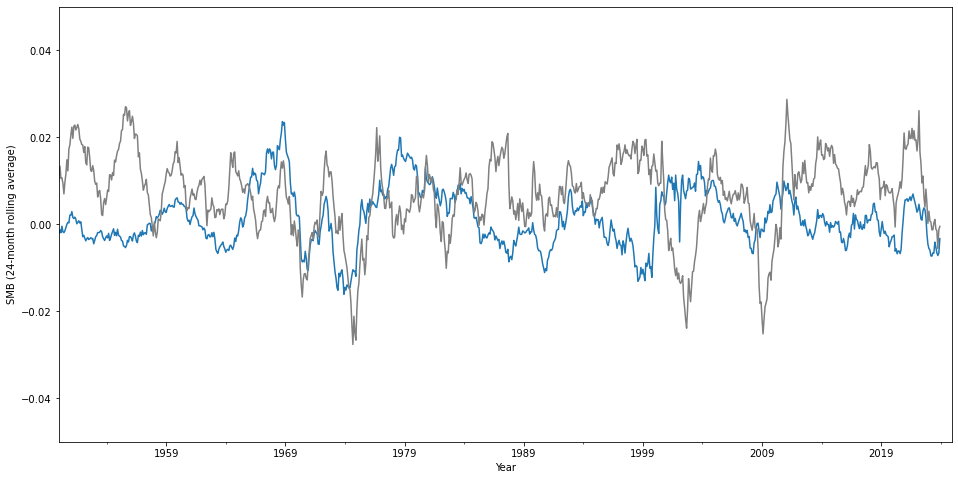

In [3]:
plot_rolling_factor('smb');

## A look at the HML factor since 1950

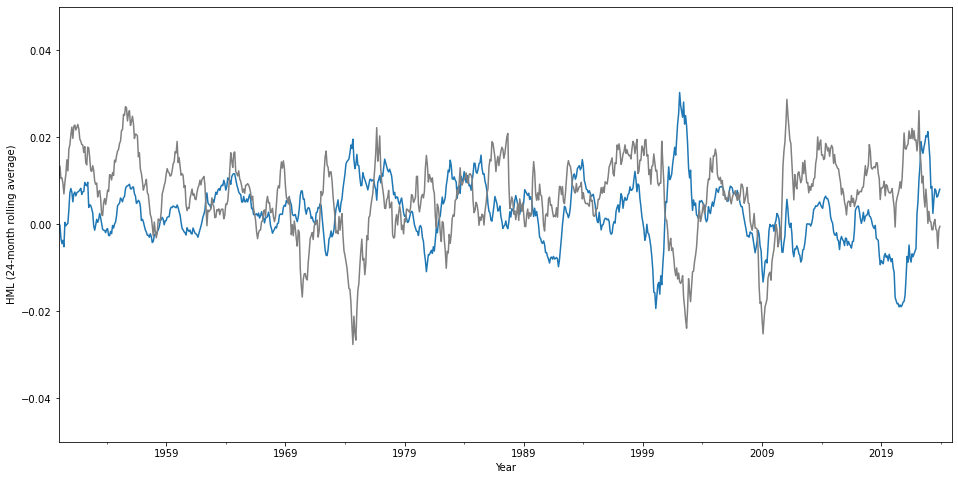

In [4]:
plot_rolling_factor('hml');

## What about momentum?

The FF momentum factor is labeled “up minus down” (UMD),
or sometimes “winners minus losers” (WML).

Each *month*, double-sort stocks on size and momentum.

After that, the approach is much the same as HML:

- Divide the stocks into groups in the same way as slide 12,
but with high and low momentum in place of high and low BM.
- Then measure the momentum factor as:
$$
r_{UMD} = \frac{1}{2}(r_{S/H} + r_{B/H} ) - \frac{1}{2}(r_{S/L} + r_{B/L} )
$$

where S/H means small-cap, high-momentum, etc.

## A look at the UMD factor since 1950

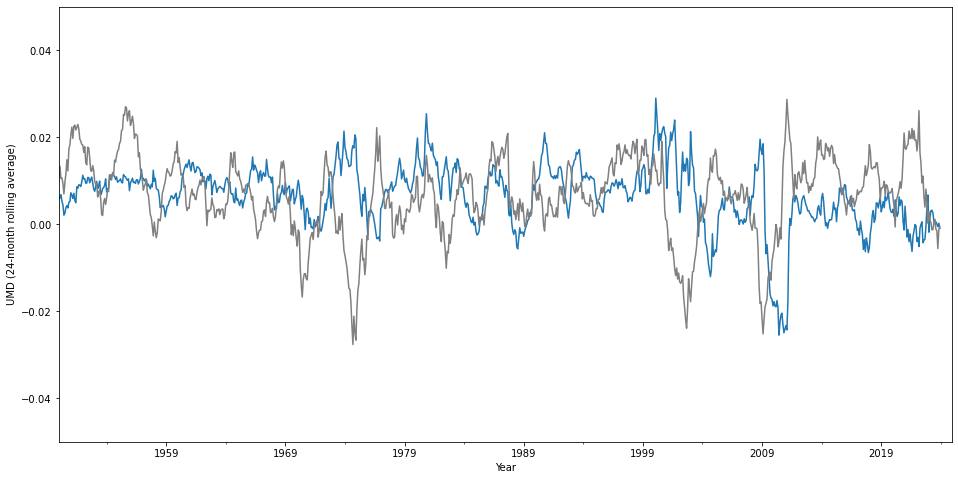

In [5]:
plot_rolling_factor('umd');

### Using factor returns to evaluate investments

Once we have measures of factor performance, we can use them
to better understand the risks and returns of other strategies.

Many strategies tilt towards buying small-cap or value stocks,
creating a natural correlation with size and value factors.

Other strategies don’t literally involve buying small-cap or value
stocks, yet still exhibit reliable correlations with these factors.

These correlations can help us to understand whether a strategy
is really new, or just repackages already-known factors.

The basic idea is just to expand the CAPM regression,
to a multivariate regression that uses additional factor measures.

## The Fama-French three-factor model

Models the returns to any strategy using the following factors:
- The market return, to capture market risk, as in the CAPM.
- The SMB measure of the size premium.
- The HML measure of the value premium.

Step 1: Estimate the “factor loadings” through a regression:

$$
r_i = α + β_M × r_M + β_{SMB} × r_{SMB} + β_{HML} × r_{HML} + e
$$

(Note that $r_i$ and $r_M$ must be *excess* returns.)

Step 2: Predicted rate of return based on the factor loadings is:

$$
β_M × \mathbb{E}[r_M] + β_{SMB} × \mathbb{E}[r_{SMB} ] + β_{HML} × \mathbb{E}[r_{HML} ]
$$

## Interpreting the results

This analysis helps to simplify the investing landscape.

The factor loadings from step 1 tell us how to construct
a synthetic strategy with the same size and value exposures.

Then you can ask: (1) if this strategy is the cheapest available
way to get those size and value effects, and (2) if it has extra
performance beyond those effects that is worthwhile investing.

Many strategies beat the CAPM, but can be fully explained by
their connection with known factors like size and value.

## Alternatives to the Fama and French factors

The F-F factors are widely used, partly because they were the
first, which makes them a natural benchmark for later research.

Their approach also pioneered many important ideas.
Most importantly, they were careful to maintain the connection
with investable strategies, by only using information that would
have actually been available to an investor.

However, some of their details were also essentially arbitrary.

Some practitioners advocate different approaches to some of
these details, and show that it can make a big difference.
Factor investing involves lots of arguments about these details.

A problem is, there’s no model to tell us the “right” approach,
because we don’t know why factor returns exist to begin with!

## Factor investing implementation

All the returns we’ve shown so far are “on-paper,”
ignoring the costs of actually creating these strategies.

How effectively can you actually implement these strategies?
And, how expensive is it to do that?

The answer is always evolving, and it depends on who you are
(an individual, an institutional investor, a fund manager).

Whoever you are, it is never simple, but gets easier every year.

### Factor investing through direct stock holdings

Factors like HML, SMB, UMD are built on a theoretical idea of
buying and short-selling an equal number of stocks.

However, the typical investor will start from a value-weighted
(passive) portfolio of all stocks, and then just allocate some
amount at the margin to a factor strategy.

So, in the end, they will probably invest a positive net amount in
every stock. That is, they will hold a long-only portfolio.

In principle, they could just buy stocks in exactly the right
amount to match their desired net holdings.

But it makes more sense to delegate this to a fund (next slide).

### Factor investing through long-only funds

Retail-facing factor products (mutual funds and ETFs)
are often labeled smart beta or fundamental indexing.

Almost all are long-only, meaning they do not use short sales.
Another way to say this is that they invest in the same stocks as
a passive fund, but use a different weighting scheme.

For example, a value-focused fund might hold all S&P500
stocks, but weight value stocks by more than their market cap.

As a more extreme example, a fund might buy only the stocks in
the “long leg” of a strategy (for example, only value stocks).

Because they are long-only, smart-beta funds still have high
market beta, and their factor loadings are typically quite small.

### Factor investing through market-neutral funds

The purest way to earn the factor returns we’ve studied
is through a dollar-neutral or market-neutral strategy.

Hedge funds like Dimensional and AQR implement this idea.

But the short-sale requirements are extreme, and it becomes
expensive to maintain and manage these positions.

For these funds, a lot the value-add is managing costs.

After initially backtesting a new strategy on historical price data,
it is critical to see how much performance comes from the short
leg, and how expensive it is to actually earn that performance.

### Market-neutral factor investing by short-selling ETFs

Traditionally, market-neutral investing requires a hedge fund.

However, the growth of ETFs has opened up some opportunities
for investors to build market-neutral strategies on their own:

Unlike a traditional mutual fund, an ETF can be sold short.

If you can find an ETF that tracks the long leg of a strategy
(e.g. value stocks), and another that tracks the short leg (e.g.
growth stocks), you can buy the first and short-sell the second
to get a homemade market-neutral portfolio.

This is only recently feasible. It requires high-quality ETFs with
strong and stable factor loadings, which can be hard to find.
But they will probably become more common as time goes on.

## Application: The equal-weighted S&P 500

The S&P 500 index corresponds with a value-weighted strategy, and most funds follow this strategy.

(The average investor *has* to follow a value-weighted strategy. Do you remember why?)

But an equal-weighted strategy is easier to think about for most people.

What may surprise you is that equal-weighting has also performed much better historically.

We will first show this fact, and then see how the Fama-French model interprets it.

## Preview of our conclusions

To preview, the equal-weighted strategy steers you much more aggressively towards small-cap and value stocks.

Both of these categories of stocks have delivered superior performance historically.

We do not claim to know why that is, or whether it will continue to be true in the future. 

But given that we already know it as a fact, the Fama-French model will show us that the equal-weighted strategy delivers performance that is roughly what you would expect, based on the way it steers you towards these two categories of stocks.

In [6]:
# Import packages

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import wrds
import fredapi
import math
import numpy as np
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

# Import data from WRDS:

conn = wrds.Connection(wrds_username='wmann')
# Fama-French factors
factors = conn.raw_sql("select date, mktrf, smb, hml, rf from ff_all.factors_monthly")
# S&P 500 index returns
SP500 = conn.raw_sql("select caldt, vwretd, ewretd from crsp_a_indexes.msp500")
# Close database connection
conn.close()

# Reorganize data:

SP500['month'] = pd.to_datetime(SP500['caldt']).dt.to_period('M')
SP500 = SP500.drop(columns=['caldt']).set_index(['month'])
SP500 = SP500['1970':'2023']

factors['month'] = pd.to_datetime(factors['date']).dt.to_period('M')
factors = factors.drop(columns=['date']).set_index('month')
factors = factors['1970':'2023']

# Merge the two datasets together.
SP500 = SP500.join(factors)

# Save data to a spreadsheet if desired
try: os.remove("SP500EW.xlsx")
except OSError: pass

# set up custom ExcelWriter engine to get the date format correct in the output file
writer = pd.ExcelWriter('SP500EW.xlsx', engine='xlsxwriter', datetime_format= "yyyy-mm")

SP500.to_excel(writer,sheet_name='Returns',index_label='Month',
                   columns=['rf','mktrf','smb','hml','vwretd','ewretd'],
                   header=['Risk-free return','Market excess return','SMB return','HML return','S&P 500 VW total return','S&P 500 EW total return'])

writer.close()

Loading library list...
Done


### Getting started

I have already created a dataframe "SP500" with the following columns:
- 'vwretd': Monthly returns on the **value-weighted** S&P 500 portfolio.
- 'ewretd': Monthly returns on the **equal-weighted** S&P 500 portfolio.
- 'mktrf': Monthly value-weighted return on all public stocks.  
  All three of the above returns assume you reinvest all dividends.
- 'smb': The SMB factor calculated by Fama and French.
- 'hml': The HML factor calculated by Fama and French.
- 'rf': Monthly risk-free returns calculated from Treasury yields.

The time period is 1970-2023.
The code for all of this is in the notebook posted online.

Here are the first two rows and last two rows of the data:

In [7]:
SP500[0:2]

,vwretd,ewretd,mktrf,smb,hml,rf
month,,,,,,
1970-01,-0.075398,-0.058388,-0.0810,0.0293,0.0313,0.0060
1970-02,0.059521,0.068592,0.0513,-0.0258,0.0393,0.0062


In [8]:
SP500[-2:]

,vwretd,ewretd,mktrf,smb,hml,rf
month,,,,,,
2023-11,0.090804,0.092772,0.0884,-0.0001,0.0161,0.0044
2023-12,0.045298,0.070662,0.0487,0.0634,0.0493,0.0043


### Plot the performance of the two strategies:

The equal-weighted strategy has generated far better cumulative return:

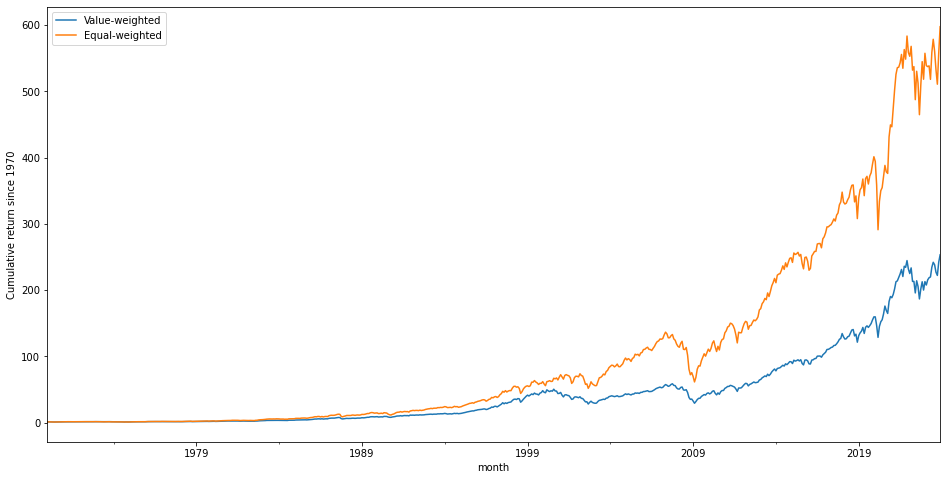

In [9]:
(1+SP500['vwretd']).cumprod().plot(legend=True,label="Value-weighted")
(1+SP500['ewretd']).cumprod().plot(legend=True,label="Equal-weighted")
plt.ylabel("Cumulative return since 1970");

### Compare average returns on the two portfolios:

The EW strategy has much higher (arithmetic) average excess return:

In [10]:
SP500['vwretd_excess'] = SP500['vwretd'] - SP500['rf']
SP500['ewretd_excess'] = SP500['ewretd'] - SP500['rf']

print("Average monthly excess return:")
print("  Value-weighted S&P 500 portfolio: "
      f"{100*SP500['vwretd_excess'].mean() :.3f}%" )
print("  Equal-weighted S&P 500 portfolio: "
      f"{100*SP500['ewretd_excess'].mean() :.3f}%" )

Average monthly excess return:
  Value-weighted S&P 500 portfolio: 0.596%
  Equal-weighted S&P 500 portfolio: 0.761%


### First step: CAPM regressions

We first run CAPM regressions for each of the strategies:

In [11]:
print("CAPM regression using value-weighted S&P 500:")
VW_CAPM = ols("vwretd_excess ~ mktrf",data=SP500).fit()
VW_CAPM.summary().tables[1]

CAPM regression using value-weighted S&P 500:


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0003,0.000,1.218,0.224,-0.000,0.001
mktrf,0.9567,0.005,179.927,0.000,0.946,0.967


In [12]:
print("CAPM regression using equal-weighted S&P 500:")
EW_CAPM = ols("ewretd_excess ~ mktrf",data=SP500).fit()
EW_CAPM.summary().tables[1]

CAPM regression using equal-weighted S&P 500:


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0013,0.001,2.286,0.023,0.000,0.003
mktrf,1.0589,0.013,83.689,0.000,1.034,1.084


### Discussion of CAPM regression results

We already know that the equal-weighted strategy has delivered higher returns.  
The CAPM regressions ask, how much is that explained by the EW strategy having a higher market beta? 

This is an important question. If the EW strategy had a much higher market beta, then it might not have been very useful in improving the Sharpe ratio of the "typical" investor who holds a value-weighted portfolio, despite its higher return.

However, this does not turn out to be the case in the regression results above. The EW strategy does have a slightly higher beta, and as a result, the difference in alpha values between the two regressions (0.1% per month) is slightly less than the difference in average excess returns we saw earlier (about 0.16% per month). But this gap is still large. So, with hindsight, a value-weighted investor could indeed have gotten a higher Sharpe ratio by tilting the weights towards equal-weighting.

Next we move on to the Fama-French analysis of these strategies.

### Second step: Fama-French regression, value-weighted S&P 500

In [13]:
print("Value-weighted portfolio, Fama-French regression:")
VW_FF = ols("vwretd_excess ~ mktrf + smb + hml",data=SP500).fit()
VW_FF.summary().tables[1]

Value-weighted portfolio, Fama-French regression:


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0003,0.000,2.065,0.039,1.26e-05,0.001
mktrf,0.9926,0.003,354.213,0.000,0.987,0.998
smb,-0.1817,0.004,-43.531,0.000,-0.190,-0.174
hml,0.0130,0.004,3.202,0.001,0.005,0.021


We estimate the following factor loadings for the value weighted S&P 500 portfolio:  
$\alpha = 0.0003$, $\beta_M = 0.9926$, $\beta_{SMB} = -0.1817$, $\beta_{HML} = 0.0130$.

### Discussion of value-weighted portfolio factor loadings

The above results should not surprise us:

- The value-weighted S&P 500 portfolio has an almost-perfect connection with the value-weighted return on the overall stock market (the factor loading on the market excess return is almost exactly 1). This makes sense because the return on the market is largely dominated by the return on the biggest 500 stocks.

- With this said, the value-weighted S&P 500 has a negative connection with the *relative* performance of the smallest 30% of stocks compared to the largest 30% of stocks by market cap (the factor loading on SMB is negative and very significant). This also makes sense, because the smallest 30% of stocks are missing from the S&P 500! In a month when they do relatively well compared to the largest 30%, that performance will help the market factor but not the S&P 500, so the S&P 500 will do worse than the market factor on a relative basis.

- The loading on HML is effectively zero, because the value-weighted S&P 500 is no more likely to hold value stocks than the value-weighted overall market. (Remember that the word "value" has two different definitions in this sentence.)

### Fama-French regression, equal-weighted S&P 500

In [14]:
print("Equal-weighted portfolio, Fama-French regression:")
EW_FF = ols("ewretd_excess ~ mktrf + smb + hml",data=SP500).fit()
EW_FF.summary().tables[1]

Equal-weighted portfolio, Fama-French regression:


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0002,0.000,0.444,0.657,-0.001,0.001
mktrf,1.0813,0.011,101.456,0.000,1.060,1.102
smb,0.1055,0.016,6.647,0.000,0.074,0.137
hml,0.2918,0.015,18.883,0.000,0.261,0.322


We estimate the following factor loadings for the equal-weighted S&P 500 portfolio:  
$\alpha = 0.0002$, $\beta_M = 1.0813$, $\beta_{SMB} = 0.1055$, $\beta_{HML} = 0.2918$.

### Discussion of equal-weighted portfolio factor loadings

What is similar and what is different to before?

- The market factor loading is still very close to 1. This is almost unavoidable with any strategy that consists of a long-only portfolio of stocks.

- The SMB loading is much higher and has actually become positive. Remember, the EW strategy holds the same stocks as the VW strategy, but within that set of stocks, by definition it steers much more aggressively towards the ones with smaller market cap. This is enough to reverse the connection with the relative performance of small compared to large stocks as captured by SMB.

- Most importantly, the loading on HML is now very strong. It should have been obvious that the EW strategy would load up on small-cap stocks, but it might not be so obvious why it should hold value stocks. Can you think back to homework 1 and remember why this is happening?

### VW strategy predicted return, based on its factor loadings:

In [15]:
print("True average monthly excess return in the data: "
      f"{100*SP500['vwretd_excess'].mean() :.4f}%")
VW_FF_loadings = VW_FF.params
VW_FF_predicted = (
    VW_FF_loadings[1]*SP500['mktrf'].mean() 
    + VW_FF_loadings[2]*SP500['smb'].mean() 
    + VW_FF_loadings[3]*SP500['hml'].mean()
)
print("Predicted avg excess return based on factor loadings: "
      f"{100*VW_FF_predicted :.4f}%")

True average monthly excess return in the data: 0.5961%
Predicted avg excess return based on factor loadings: 0.5704%


### EW strategy predicted return, based on its factor loadings:

In [16]:
print("True average monthly excess return in the data: "
      f"{100*SP500['ewretd_excess'].mean() :.4f}%")
EW_FF_loadings = EW_FF.params
EW_FF_predicted = (
    EW_FF_loadings[1]*SP500['mktrf'].mean() 
    + EW_FF_loadings[2]*SP500['smb'].mean() 
    + EW_FF_loadings[3]*SP500['hml'].mean()
)
print("Predicted avg excess return based on factor loadings: "
      f"{100*EW_FF_predicted :.4f}%")

True average monthly excess return in the data: 0.7610%
Predicted avg excess return based on factor loadings: 0.7401%


Conclusion: The Fama-French model predicts an average return on the equal-weighted S&P 500 that is roughly in line with what we actually see in the data. The difference between this prediction, and the true value in the data, is measured by the intercept of the regression ($\alpha$) and is only about 2 basis points per month, no longer big enough to care about.

What exactly does this mean? We are *not* saying that the equal-weighted strategy is a "bad" strategy. It really does deliver positive $\alpha$ when we use the CAPM, and this means the same thing as it always does: An investor could have improved their Sharpe ratio, during the time period that we study, by tilting their weighting of stocks away from market-cap weighting and towards equal-weighting.

What we *are* saying, is that we should not be surprised by the performance of the equal-weighted strategy, once we understand the following: 

1. The performance of the equal-weighted strategy is closely tied to the performance of small-cap stocks and value stocks, comapred to the value-weighted strategy. This is measured by the factor loadings (the $\beta$ numbers) in the second regression above, which are much bigger numbers than in the first regression.

2. We are studying this strategy during a time period when we already know that value stocks delivered particularly good returns.

Quantitatively, we can also say that once we account for these characteristics of the equal-weighted strategy, we have completely "explained" its superior performance compared to the value-weighted strategy, and there is really nothing left to see here.. This is measured by the intercept ($\alpha$) in the second regression.

These observations should change how we think about the equal-weighted strategy. It is best seen as a vehicle for getting any extra return on value stocks. 

Based on this analysis, you have two questions to answer when assessing the equal-weighted strategy:

1. Do you think value stocks will continue to outperform in the future? As we have seen, this is far from clear. If not, then there is no particular reason for you to be interested in this strategy.

2. If you do want to invest in value stocks, is this the best way to do it? It might be: This fund is a very cheap and effective way of loading up on the value premium. At the same time, you might be able to get more effective loadings with a fund that also short-sells growth stocks. This would be a personal decision. 

For the average retail investor, equal-weighting might very well be the most effective way to pursue a value-oriented strategy. The most important thing for us all to understand, is that equal-weighting is just a way of implementing the well-known value strategy, nothing more.